<a href="https://colab.research.google.com/github/NoorFatimaMemon/GRIP-Study-Hour-Linear-Regression-Prediction/blob/main/GRIP_Task_1_Study_Hour_Linear_Regression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Rotational Internship Program (GRIP)**
## **Data Science & Business Analytics Intern**
### Task 01: Prediction of the percentage of a student based upon the number of study hours. (**By Noor Fatima Memon**)

#### **Importing libraries**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

#### **Data Loading**

In [60]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)           # df = DataFrame
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [61]:
# statistical analysis of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


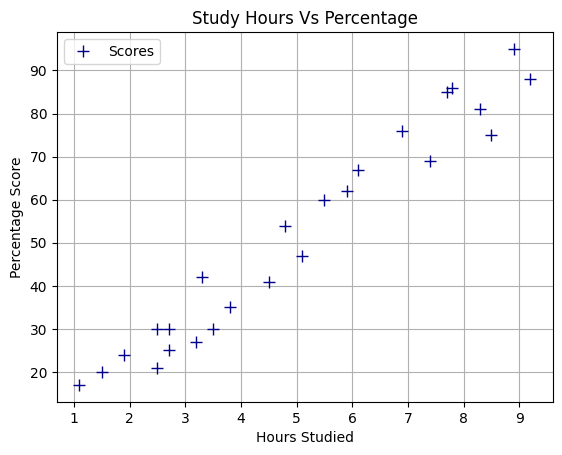

In [73]:
# Plotting the distribution of scores
df.plot(x="Hours", y="Scores", style="+", color='darkblue', markersize=8)
plt.title("Study Hours Vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### **Preparing the data**

In [64]:
data = df.values
x = data[:, 0:1]
y = data[:, 1]

### **Training the Model**

In [65]:
# Splitting of the dataset to train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
model = LinearRegression()        #Creating an instance of Linear Regression
model.fit(x_train, y_train)       #Fitting the model to the training data

LinearRegression()

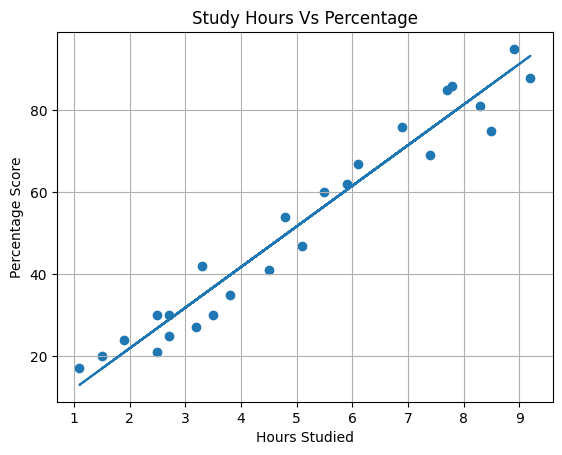

In [75]:
# Plotting the regression line
line = model.coef_*x+model.intercept_
# Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,)
plt.title("Study Hours Vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### **Making Predictions**

In [67]:
# Testing data - In Hours
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]]


In [68]:
# Predicting the scores
y_pred = model.predict(x_test)
y_pred

array([16.92714815, 33.7882695 , 75.44515755, 26.84545482])

In [76]:
# Comparing Actual vs Predicted data
comparing_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparing_data

,Actual,Predicted
0,20.0,16.927148
1,27.0,33.788269
2,69.0,75.445158
3,30.0,26.845455


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(comparing_data, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(comparing_data, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(comparing_data, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(comparing_data, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(comparing_data, *[[['Actual', 'Predicted']]], **{})
chart

# **Calculate model performance metrics or Evaluating the model**

In [77]:
# Assuming you have true target values (y_true) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # You need to import numpy as np for this
r2 = r2_score(y_test, y_pred)

# Define a threshold for considering predictions as accurate
threshold = 4.9  # Adjust this threshold as needed

# Calculate a custom accuracy score based on the threshold
accuracy = (mae <= threshold).mean()

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared', 'Regression Accuracy'],
    'Value': [mae, mse, rmse, r2*100, accuracy]
})

print(metrics_df)


                Metric      Value
0                  MAE   4.865206
1                  MSE  26.753558
2                 RMSE   5.172384
3            R-squared  92.675275
4  Regression Accuracy   1.000000


In [71]:
# Prediction Score of student studies for 9.25hrs/day
hours = 9.25
hours_2d = [[hours]]
score_pred = model.predict(hours_2d)
print("Prediction Score of student studies for 9.25hrs/day:", score_pred[0])

Prediction Score of student studies for 9.25hrs/day: 93.79402490359651
